In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Matplotlib is building the font cache; this may take a moment.


Numeric Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Categorical Columns: []


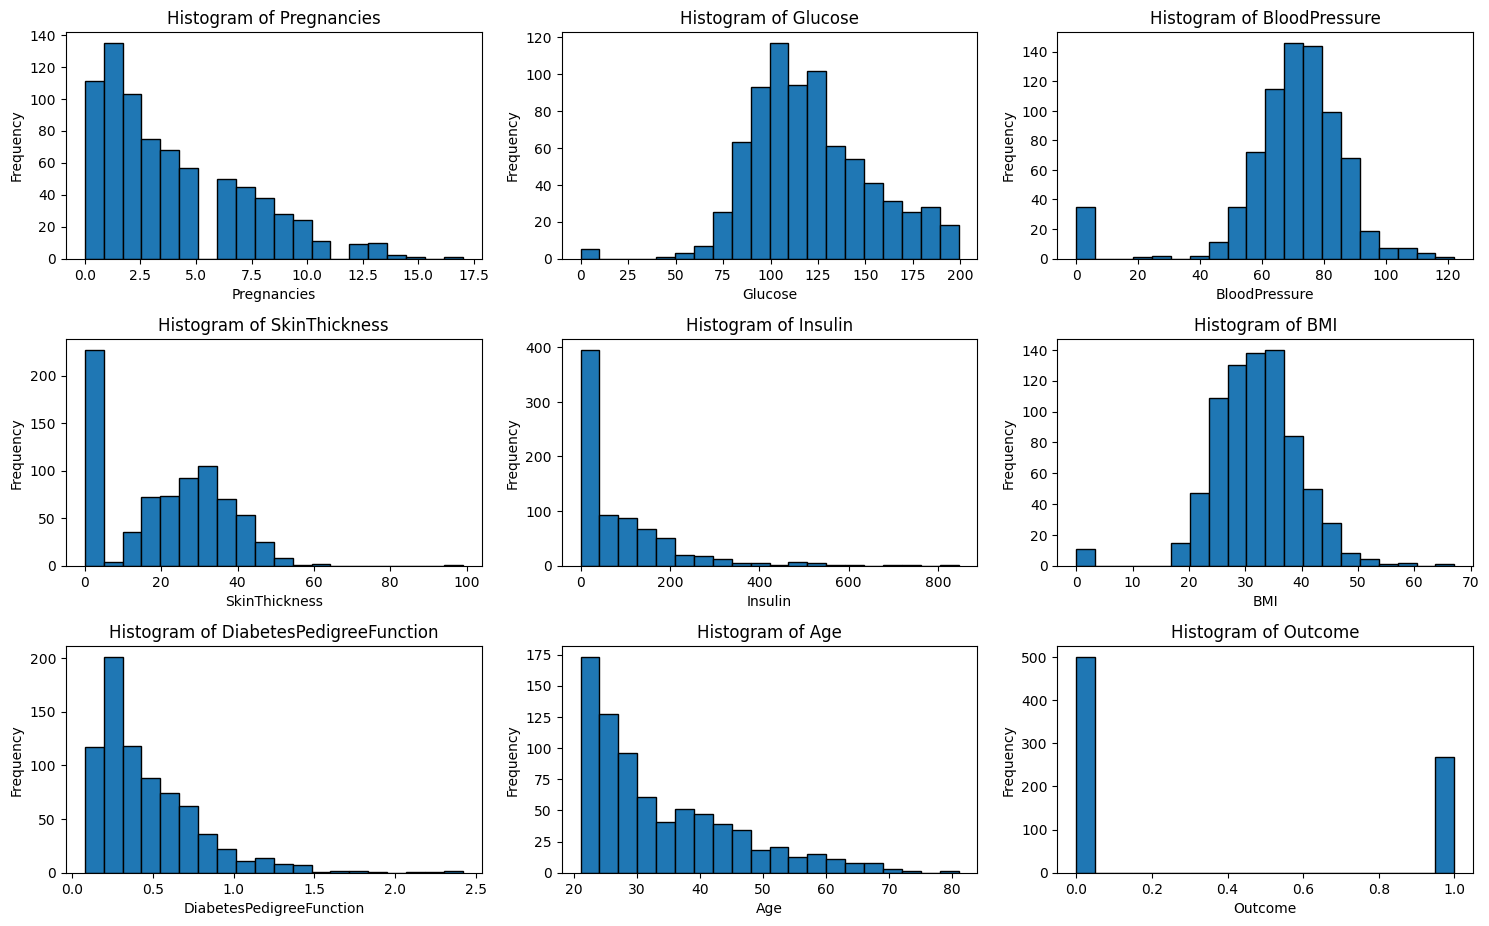

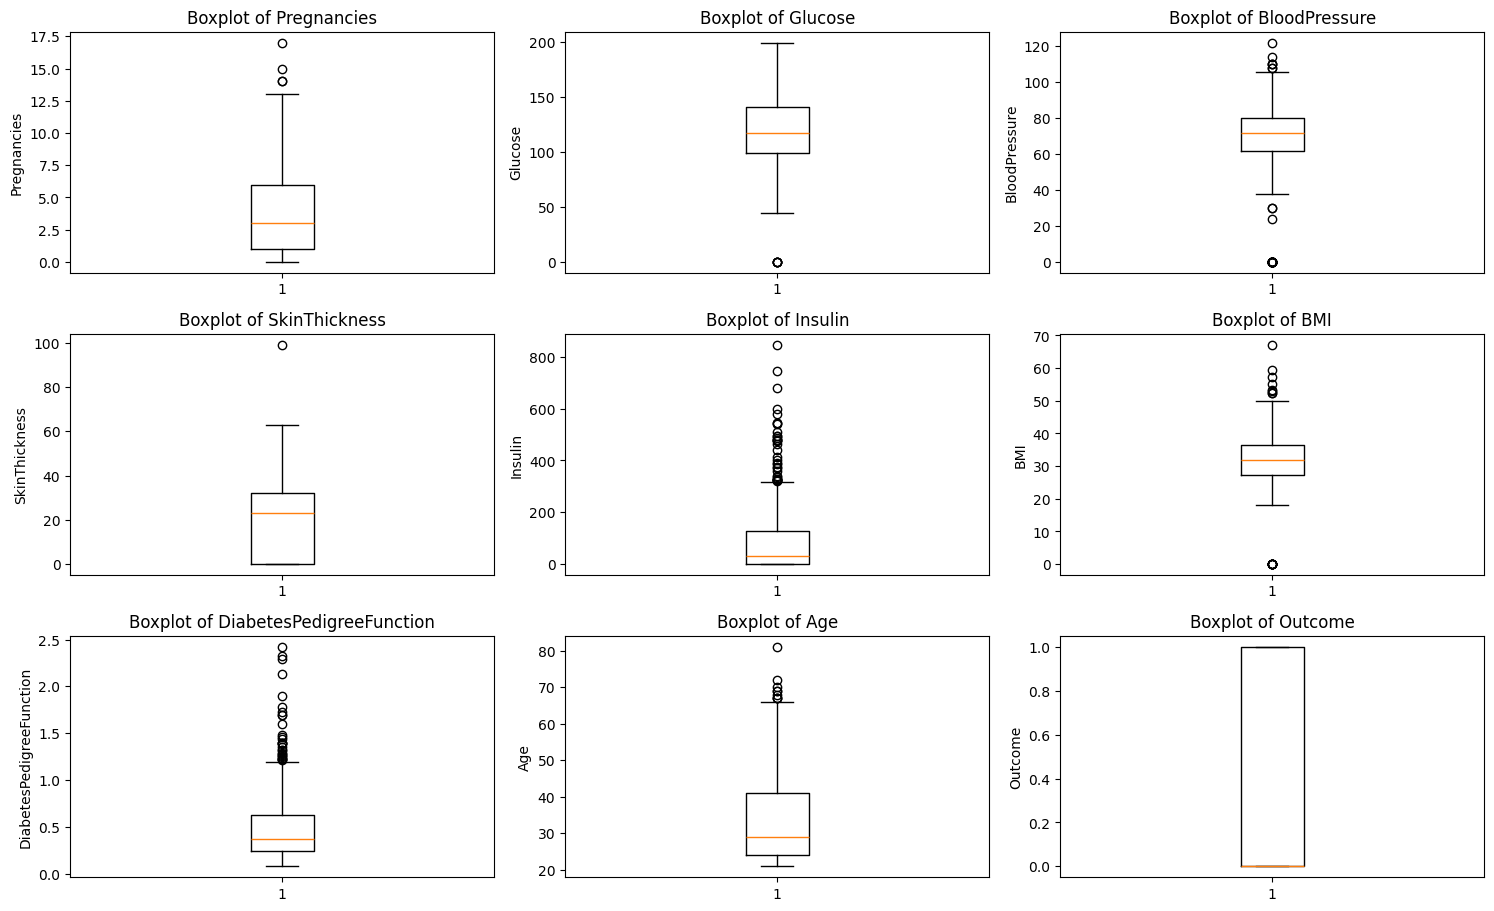

In [4]:
import matplotlib.pyplot as plt
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print("Numeric Columns:", list(numeric_cols))
print("Categorical Columns:", list(categorical_cols))

# ------------------------------
#  Histograms for Numerical Features
# ------------------------------

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)  # Adjust layout based on number of columns
    plt.hist(df[col].dropna(), bins=20, edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# ------------------------------
#  Box Plots for Numerical Features
# ------------------------------

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    plt.boxplot(df[col].dropna())
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)

plt.tight_layout()
plt.show()


Numeric Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Categorical Columns: []


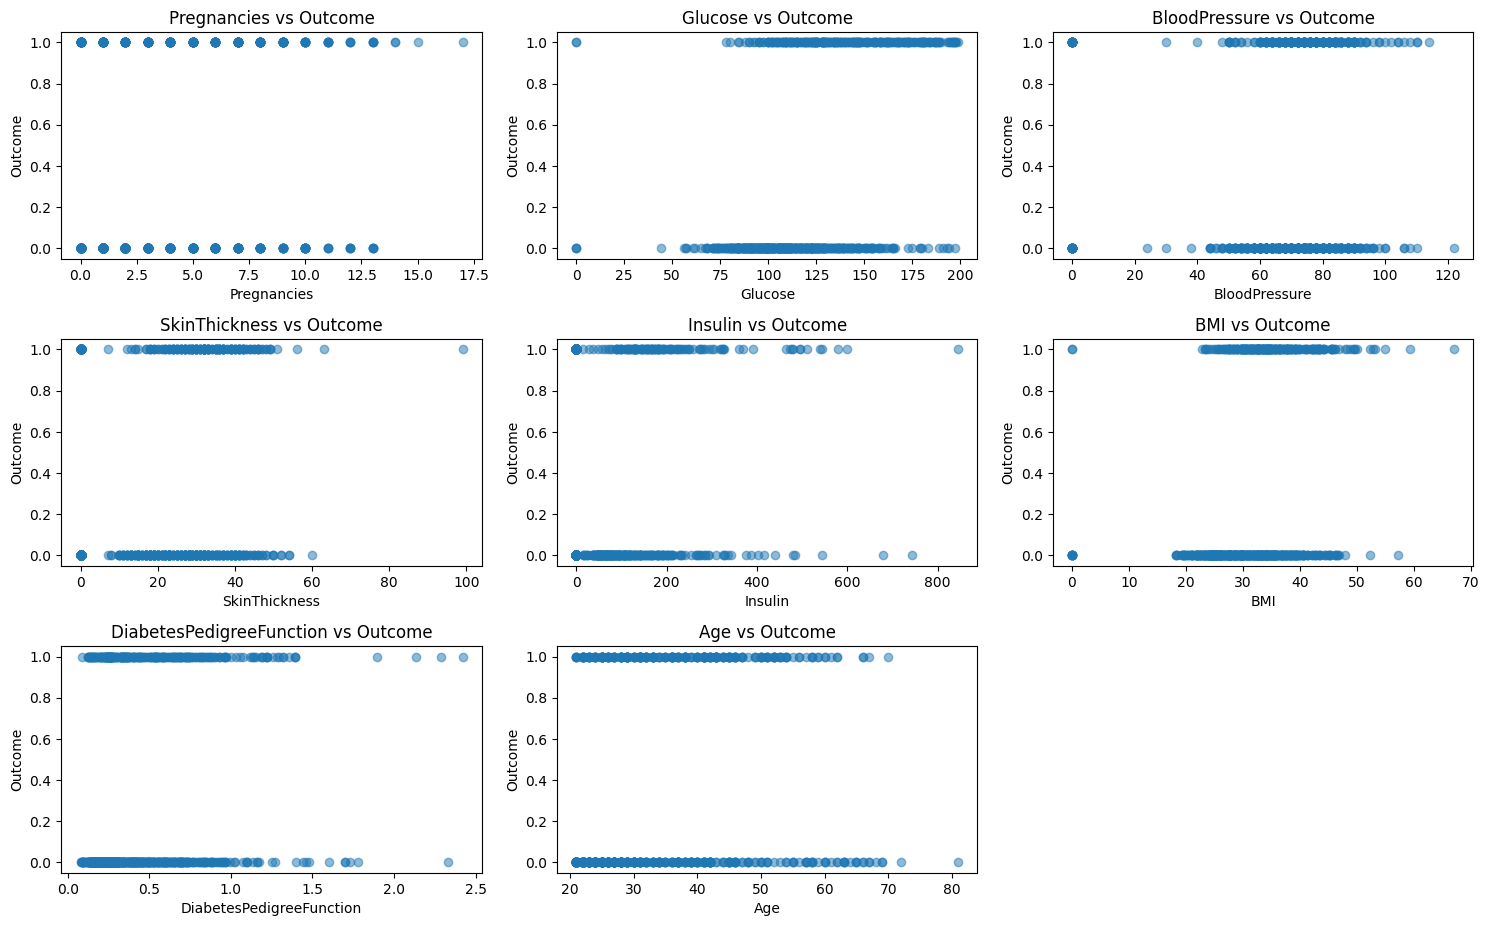

<Figure size 1500x1200 with 0 Axes>

In [5]:


# Assuming df already exists and 'Survived' is the target variable
target = "Outcome"

# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(target)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print("Numeric Columns:", list(numeric_cols))
print("Categorical Columns:", list(categorical_cols))

# --------------------------------------
#  Scatter plots for numeric features vs Survival
# --------------------------------------

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    plt.scatter(df[col], df[target], alpha=0.5)
    plt.title(f"{col} vs {target}")
    plt.xlabel(col)
    plt.ylabel(target)

plt.tight_layout()
plt.show()

# --------------------------------------
#  Bar plots for categorical variables vs Survival
# --------------------------------------

plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 3, i)
    
    # Calculate survival count per category
    survival_rates = df.groupby(col)[target].mean()
    
    plt.bar(survival_rates.index.astype(str), survival_rates.values)
    plt.title(f"Survival Rate by {col}")
    plt.xlabel(col)
    plt.ylabel("Survival Rate")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [6]:
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# ----------------------------------
#  Impute Numeric Columns (Mean)
# ----------------------------------
for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# ----------------------------------
#  Impute Categorical Columns (Mode)
# ----------------------------------
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing values after imputation:\n", df.isnull().sum())


<ipython-input-6-eb440ded7a11>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)



Missing values after imputation:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
# we don't have the categorical 

Categorical Columns: []
Binary Encoded Columns: []
One-Hot Encoded Columns: []

Updated dataset shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("diabetes.csv")

# Separate features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Initialize scaler
scaler = StandardScaler()

# Fit + transform only feature columns
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled_df.head())
print("\nTarget variable (Outcome) unchanged:")
print(y.head())


   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496  

Target variable (Outcome) unchanged:
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [17]:
from sklearn.model_selection import train_test_split

# Define target and features
target = "Outcome"
X = df.drop(columns=[target])
y = df[target]

# Perform 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (614, 8)
Testing set shape: (154, 8)


In [24]:
from sklearn.metrics import accuracy_score,classification_report
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# ------------------------------
# LightGBM Classifier
# ------------------------------
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

lgbm_pred = lgbm.predict(X_test)

print("🔹 LightGBM Accuracy:", accuracy_score(y_test, lgbm_pred))
print("🔹 LightGBM Classification Report:")
print(classification_report(y_test, lgbm_pred))

# ------------------------------
# XGBoost Classifier
# ------------------------------
xgb = XGBClassifier(
    eval_metric="logloss",   # avoids warnings
    use_label_encoder=False
)
xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)

print("🔹 XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print("🔹 XGBoost Classification Report:")
print(classification_report(y_test, xgb_pred))

[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000000 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:28:02] WARNING: /root/repo/packages/xgboost/build/xgboost-2.1.2/cpp_src/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🔹 XGBoost Accuracy: 0.7077922077922078
🔹 XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.74      0.76        99
           1       0.58      0.65      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154



In [ ]:

from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
from xgboost import XGBClassifier

# -------------------------------------------------------
# ShuffleSplit Cross-Validation
# -------------------------------------------------------
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# -------------------------------------------------------
# LightGBM Hyperparameter Grid
# -------------------------------------------------------
lgb_model = lgb.LGBMClassifier(random_state=42)

lgb_params = {
    'num_leaves': [15, 31, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

lgb_grid = GridSearchCV(
    estimator=lgb_model,
    param_grid=lgb_params,
    cv=cv,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Fit LGBM
lgb_grid.fit(X_train, y_train)

print("Best LightGBM Params:", lgb_grid.best_params_)
print("Best LGBM F1 Score:", lgb_grid.best_score_)

# Predict
lgb_pred = lgb_grid.predict(X_test)

print("\nLGBM Test Accuracy:", accuracy_score(y_test, lgb_pred))
print("LGBM Precision:", precision_score(y_test, lgb_pred))
print("LGBM Recall:", recall_score(y_test, lgb_pred))
print("LGBM F1:", f1_score(y_test, lgb_pred))

# -------------------------------------------------------
# XGBoost Hyperparameter Grid
# -------------------------------------------------------
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

xgb_params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

xgb_grid = GridSearchCV(
    estimator=xgb_model,
    param_grid=xgb_params,
    cv=cv,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Fit XGB
xgb_grid.fit(X_train, y_train)

print("\nBest XGBoost Params:", xgb_grid.best_params_)
print("Best XGB F1 Score:", xgb_grid.best_score_)

# Predict
xgb_pred = xgb_grid.predict(X_test)

print("\nXGB Test Accuracy:", accuracy_score(y_test, xgb_pred))
print("XGB Precision:", precision_score(y_test, xgb_pred))
print("XGB Recall:", recall_score(y_test, xgb_pred))
print("XGB F1:", f1_score(y_test, xgb_pred))



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

In [ ]:
""" XGBoost is the Stronger model in this scenario,particularly for medical classification where precision and recall are critical.
LightGBM remains a great option when speed matters"""